In [1]:
#geneticriskR - https://github.com/aballou16/geneticriskR

In [2]:
library(geneticriskR)
simple_mod <- simple_logistic_reg(test_data, "hypertension")
simple_mod


Call:  glm(formula = full_table[[phenotype]] ~ prs, family = "binomial", 
    data = full_table)

Coefficients:
(Intercept)          prs  
   -1.13977     -0.03023  

Degrees of Freedom: 3299 Total (i.e. Null);  3298 Residual
Null Deviance:	    3655 
Residual Deviance: 3655 	AIC: 3659

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = full_table[[phenotype]], predictor = my_model$fitted.values,     plot = TRUE)

Data: my_model$fitted.values in 2500 controls (full_table[[phenotype]] 0) < 800 cases (full_table[[phenotype]] 1).
Area under the curve: 0.5052

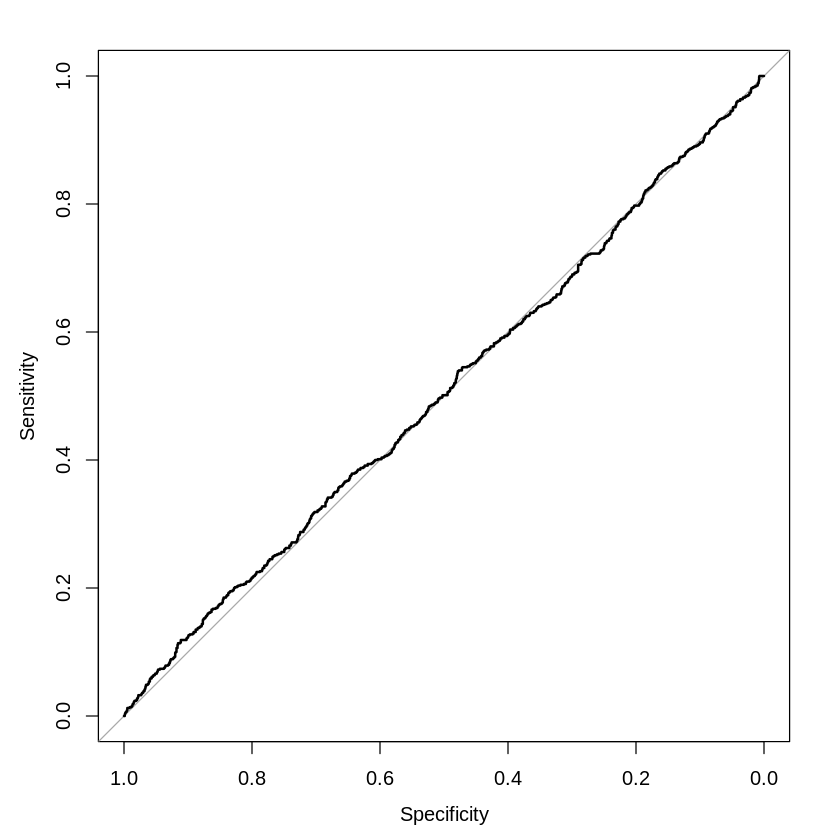

In [3]:
proc_analysis(test_data, "hypertension", simple_mod)

cases = 1, controls = 0



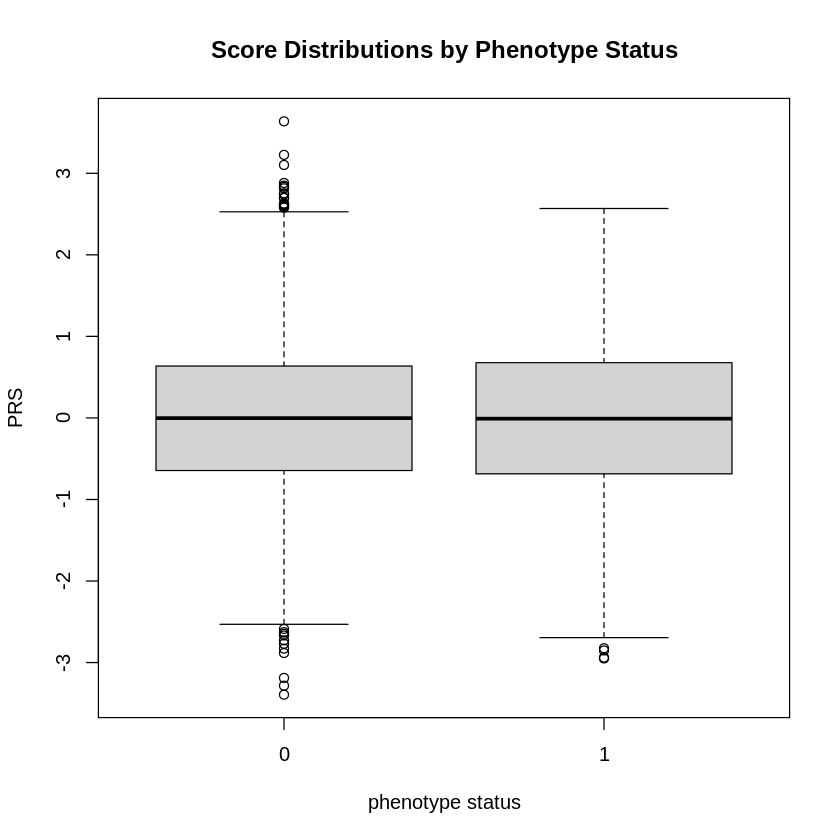

In [4]:
compare_boxplots(test_data, "hypertension", "prs")

In [5]:
phenotype_table <- pheno_select(pheno_data, "hypertension")
head(phenotype_table)

,hypertension,age,sex,IID
,<dbl>,<dbl>,<dbl>,<int>
1,1,10,1,1
2,1,10,1,2
3,1,10,1,3
4,1,10,1,4
5,1,10,1,5
6,1,10,1,6


In [8]:
##Step 3. Select which phenotype you would like to use from the phenotype file using pheno_select(). In this example, we chose hypertension**

phenotype_table <- pheno_select(pheno_data, "hypertension")
head(phenotype_table)

,hypertension,age,sex,IID
,<dbl>,<dbl>,<dbl>,<int>
1,1,10,1,1
2,1,10,1,2
3,1,10,1,3
4,1,10,1,4
5,1,10,1,5
6,1,10,1,6


In [9]:
##Note: pass your phenotype column name (in this case, hypertension) as a character vector*

##Step 4. Join the newly generated phenotype_table with the score_table you previously read in using join_scores()**
full_table <- join_scores(phenotype_table, score_data)
head(full_table)


,hypertension,age,sex,IID,prs
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,10,1,1,1.2621457
2,1,10,1,2,1.6746647
3,1,10,1,3,0.8662574
4,1,10,1,4,-0.1714374
5,1,10,1,5,-0.6579478
6,1,10,1,6,-1.4797553


In [11]:
##Step 5. Perform analyses on full_table to assess the predictive power of the scores. In this example, we will use a simple logistic regression model using simple_logistic_reg() and examine the area under the curve using proc_analysis()**
#simple logistic regression
simple_mod <- simple_logistic_reg(full_table, "hypertension")
summary(simple_mod)


Call:
glm(formula = full_table[[phenotype]] ~ prs, family = "binomial", 
    data = full_table)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7520  -0.7460  -0.7443  -0.7401   1.6932  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.13966    0.04065 -28.038   <2e-16 ***
prs         -0.00674    0.04125  -0.163     0.87    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3655.5  on 3299  degrees of freedom
Residual deviance: 3655.4  on 3298  degrees of freedom
AIC: 3659.4

Number of Fisher Scoring iterations: 4


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = full_table[[phenotype]], predictor = my_model$fitted.values,     plot = TRUE)

Data: my_model$fitted.values in 2500 controls (full_table[[phenotype]] 0) < 800 cases (full_table[[phenotype]] 1).
Area under the curve: 0.5031

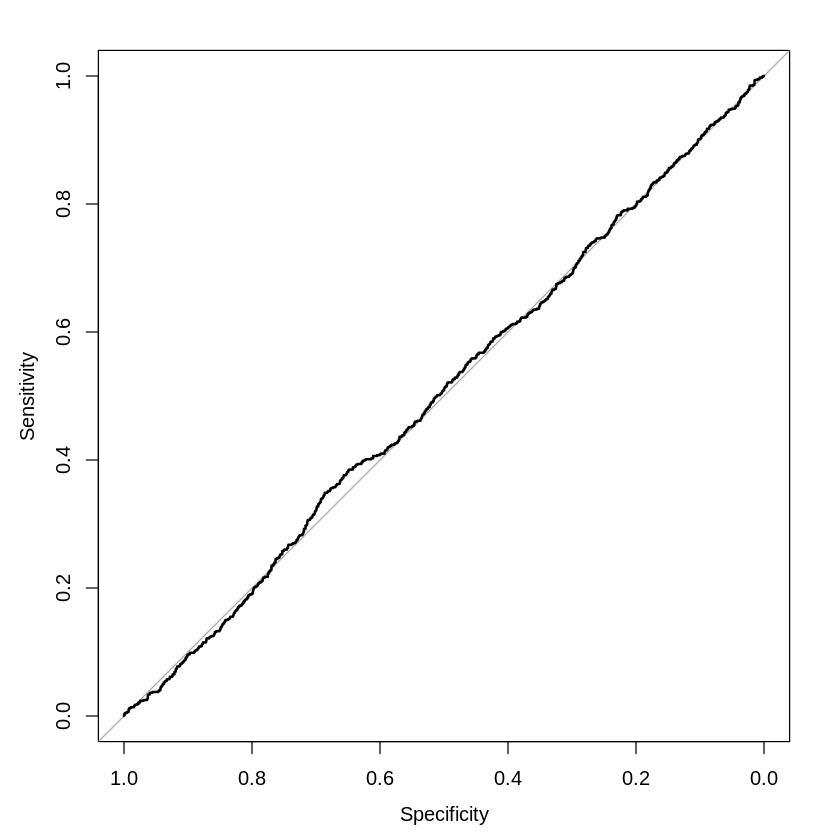

In [12]:
#ROC/AUC analysis using the previously generated, 'simple_mod'
proc_analysis(full_table, "hypertension", simple_mod)

cases = 1, controls = 0



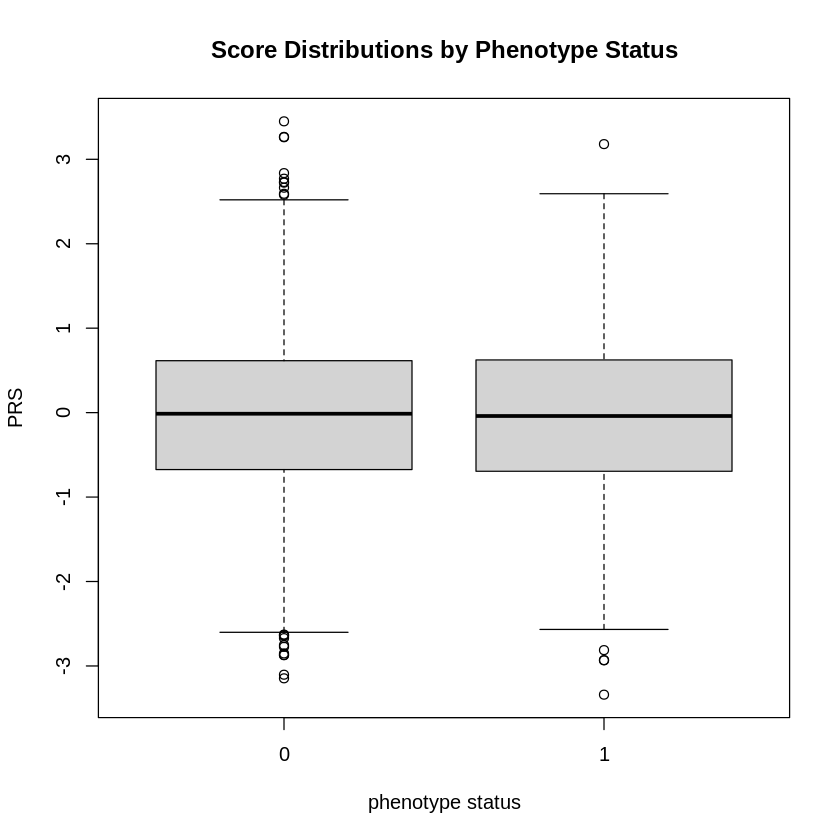

In [13]:
#Step 6. Examine the distribution of the scores visually. In this example, we will examine side by side boxplots for the scores in cases and controls using compare_boxplots(). **

compare_boxplots(full_table, "hypertension", "prs")


In [14]:
##Examples for simPRS - https://github.com/andreyshabalin/simPRS

In [16]:
library(simPRS)

Loading required package: parallel



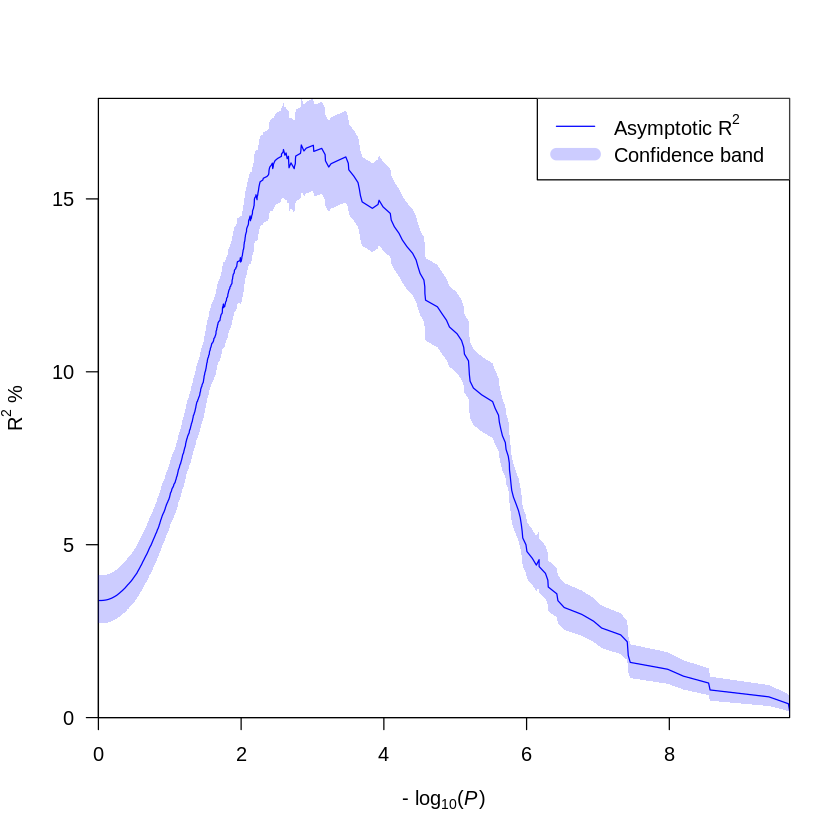

In [17]:
# Parameters
NTotalSNPs = 10000
NSignalSnps = 100
heritability = 0.2
signalDistr = "Same"
Ntrain = 10000
Ntest = 10000

signal = genSignal(
            NSignalSnps = NSignalSnps,
            NTotalSNPs = NTotalSNPs,
            heritability = heritability,
            signalDistr = signalDistr)
            
gwas = gwasFast(signal = signal, N = Ntrain)

prs = prsInf(
            gwasPV = gwas$pv,
            gwasBt = gwas$beta,
            signal = signal)

rci = rConfInt(r = prs$r, N = Ntest)

prsPlot(pv = prs$pv, r = prs$r, rci)

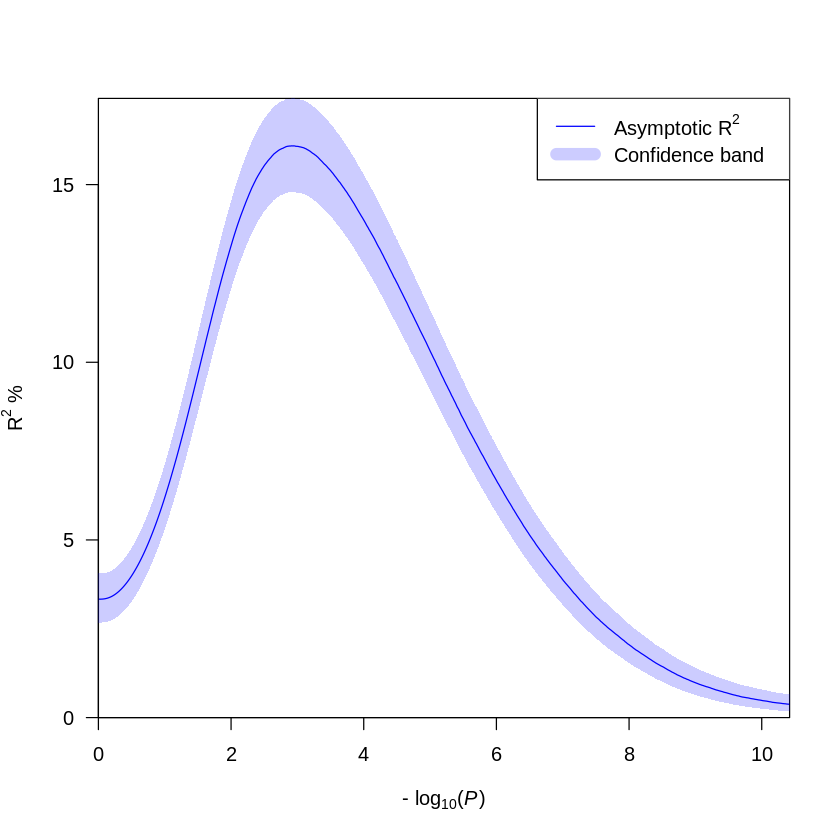

In [18]:
Nsim = 1000

prsA = prsMultitest(signal = signal, N = Ntrain, Nsim = Nsim)

rci = rConfInt(r = prsA$r, N = Ntest)

prsPlot(pv = prsA$pv, r = prsA$r, rci)

In [19]:
##Examples for PredictABEL - https://www.rdocumentation.org/packages/PredictABEL/

In [10]:
library(PredictABEL)

Warning message:
“no DISPLAY variable so Tk is not available”


In [11]:
# NOT RUN {
# specify dataset with outcome and predictor variables
data(ExampleData) 
# specify column numbers of genetic predictors
cGenPred <- c(11:16)


In [12]:
# fit a logistic regression model
# all steps needed to construct a logistic regression model are written in a function
# called 'ExampleModels', which is described on page 4-5
riskmodel <- ExampleModels()$riskModel2

In [13]:
# compute unweighted risk scores 
riskScore <- riskScore(weights=riskmodel, data=ExampleData, 
cGenPreds=cGenPred, Type="unweighted")

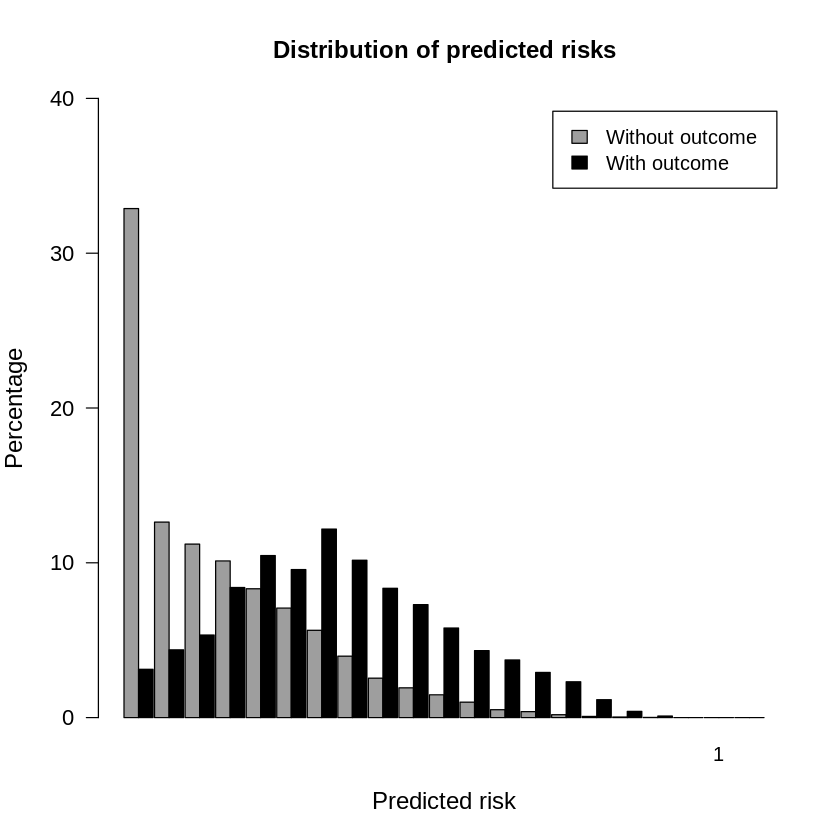

In [14]:
# specify dataset with outcome and predictor variables
data(ExampleData)
# specify column number of the outcome variable
cOutcome <- 2

# fit a logistic regression model
# all steps needed to construct a logistic regression model are written in a function
# called 'ExampleModels', which is described on page 4-5
riskmodel <- ExampleModels()$riskModel2

# obtain predicted risks
predRisk <- predRisk(riskmodel)

# specify the size of each interval
interval <- .05
# specify label of x-axis
xlabel <- "Predicted risk"
# specify label of y-axis
ylabel <- "Percentage"
# specify range of x-axis
xrange <- c(0,1)
# specify range of y-axis
yrange <- c(0,40)
# specify title for the plot
maintitle <- "Distribution of predicted risks"
# specify labels
labels <- c("Without outcome", "With outcome")

# produce risk distribution plot
plotRiskDistribution(data=ExampleData, cOutcome=cOutcome,
risks=predRisk, interval=interval, plottitle=maintitle, rangexaxis=xrange,
rangeyaxis=yrange, xlabel=xlabel, ylabel=ylabel, labels=labels)

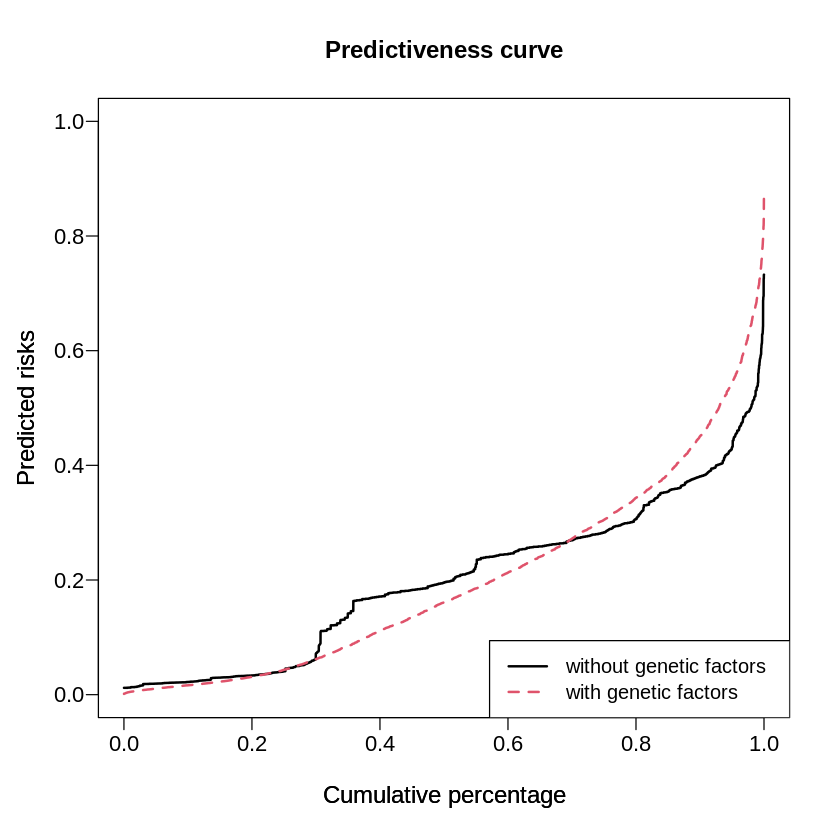

In [15]:

data(ExampleData)

# fit logistic regression models
# all steps needed to construct a logistic regression model are written in a function
# called 'ExampleModels', which is described on page 4-5
riskmodel1 <- ExampleModels()$riskModel1
riskmodel2 <- ExampleModels()$riskModel2

# obtain predicted risks
predRisk1 <- predRisk(riskmodel1)
predRisk2 <- predRisk(riskmodel2)

# specify range of y-axis
rangeyaxis <- c(0,1) 
# specify labels of the predictiveness curves
labels <- c("without genetic factors", "with genetic factors")

# produce predictiveness curves
plotPredictivenessCurve(predrisk=cbind(predRisk1,predRisk2),
rangeyaxis=rangeyaxis, labels=labels)

AUC [95% CI] for the model 1 :  0.579 [ 0.567  -  0.591 ] 


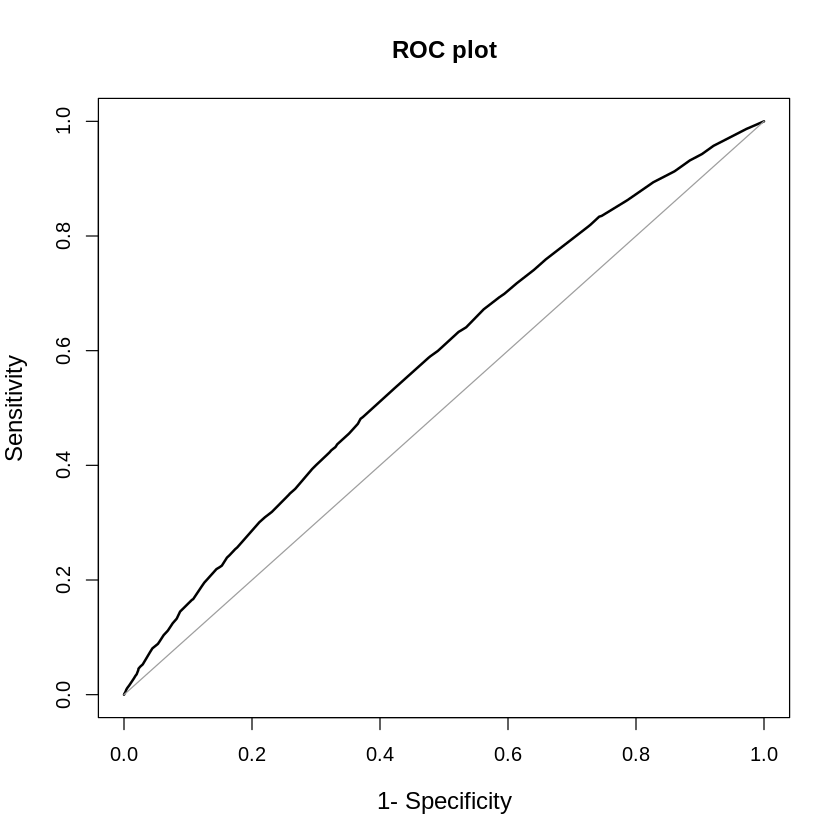

In [16]:
# specify the matrix containing the ORs and frequencies of genetic variants 
# In this example we used per allele effects of the risk variants
ORfreq<-cbind(c(1.35,1.20,1.24,1.16), rep(1,4), c(.41,.29,.28,.51),rep(1,4))

# specify the population disease risk
popRisk <- 0.3
# specify size of hypothetical population
popSize <- 10000

# Obtain the simulated dataset
Data <- simulatedDataset(ORfreq=ORfreq, poprisk=popRisk, popsize=popSize)

# Obtain the AUC and produce ROC curve
plotROC(data=Data, cOutcome=4, predrisk=Data[,3])

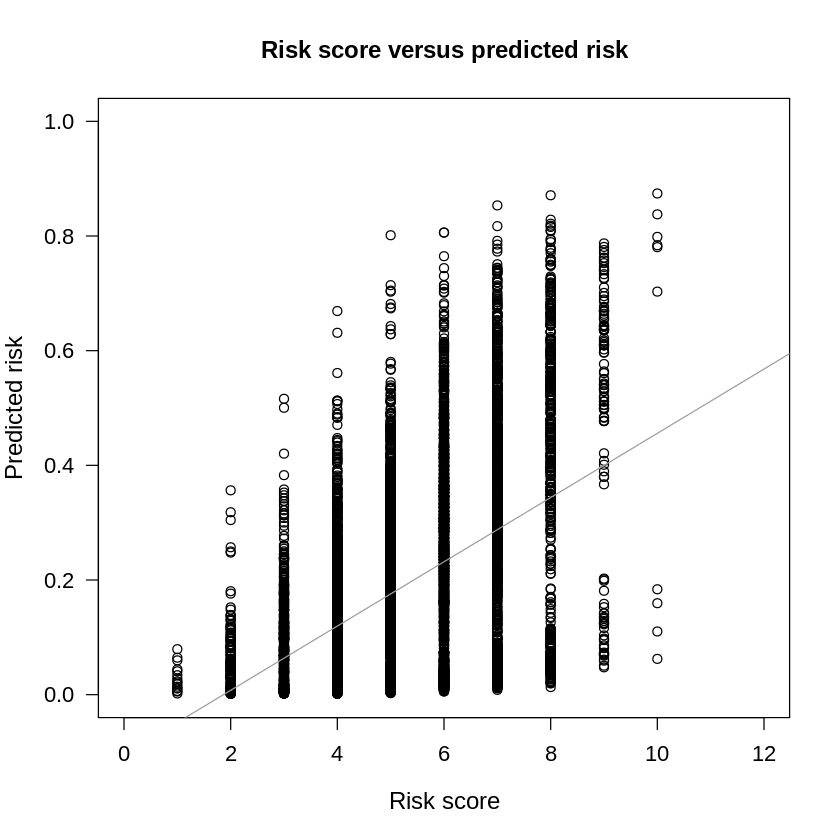

In [17]:
# specify dataset with outcome and predictor variables
data(ExampleData)

# fit a logistic regression  model
# all steps needed to construct a logistic regression model are written in a function
# called 'ExampleModels', which is described on page 4-5
riskmodel <- ExampleModels()$riskModel2

# obtain predicted risks
predRisk <- predRisk(riskmodel)

# specify column numbers of genetic predictors
cGenPred <- c(11:16)

# function to compute unweighted genetic risk scores
riskScore <- riskScore(weights=riskmodel, data=ExampleData, 
cGenPreds=cGenPred, Type="unweighted")

# specify range of x-axis
rangexaxis <- c(0,12)   
# specify range of y-axis
rangeyaxis <- c(0,1)     
# specify label of x-axis
xlabel <- "Risk score"     
# specify label of y-axis
ylabel <- "Predicted risk" 
# specify title for the plot
plottitle <- "Risk score versus predicted risk"

# produce risk score-predicted risk plot
plotRiskscorePredrisk(data=ExampleData, riskScore=riskScore, predRisk=predRisk, 
plottitle=plottitle, xlabel=xlabel, ylabel=ylabel, rangexaxis=rangexaxis, 
rangeyaxis=rangeyaxis)

In [18]:
#Examples for lassosum -- https://choishingwan.github.io/PRS-Tutorial/lassosum/

In [2]:
library(lassosum)
# Prefer to work with data.table as it speeds up file reading
library(data.table)
library(methods)
library(magrittr)
# For multi-threading, you can use the parallel package and 
# invoke cl which is then passed to lassosum.pipeline
library(parallel)
# This will invoke 2 threads. 
cl <- makeCluster(2)

In [3]:
sum.stat <- "Height.QC.gz"
bfile <- "EUR.QC"
# Read in and process the covariates
covariate <- fread("EUR.cov")
pcs <- fread("EUR.eigenvec") %>%
    setnames(., colnames(.), c("FID","IID", paste0("PC",1:6)))
# Need as.data.frame here as lassosum doesn't handle data.table 
# covariates very well
cov <- merge(covariate, pcs)

In [4]:

# We will need the EUR.hg19 file provided by lassosum 
# which are LD regions defined in Berisa and Pickrell (2015) for the European population and the hg19 genome.
ld.file <- "EUR.hg19"
# output prefix
prefix <- "EUR"
# Read in the target phenotype file
target.pheno <- fread("EUR.height")[,c("FID", "IID", "Height")]
# Read in the summary statistics
ss <- fread(sum.stat)
# Remove P-value = 0, which causes problem in the transformation
ss <- ss[!P == 0]
# Transform the P-values into correlation
cor <- p2cor(p = ss$P,
        n = ss$N,
        sign = log(ss$OR)
        )
fam <- fread(paste0(bfile, ".fam"))
fam[,ID:=do.call(paste, c(.SD, sep=":")),.SDcols=c(1:2)]

Coordinating summary stats with reference panel...
Coordinating summary stats with test data...
Coordinating summary stats, reference panel, and test data...
Splitting genome by LD blocks ...
Running lassosum ...
s =  0.2 
s =  0.5 
s =  0.9 
Running lassosum with s=1...
Calculating polygenic scores ...


472 out of 475 samples kept in pheno.

472 out of 483 samples kept in covar.



Calculating PGS...


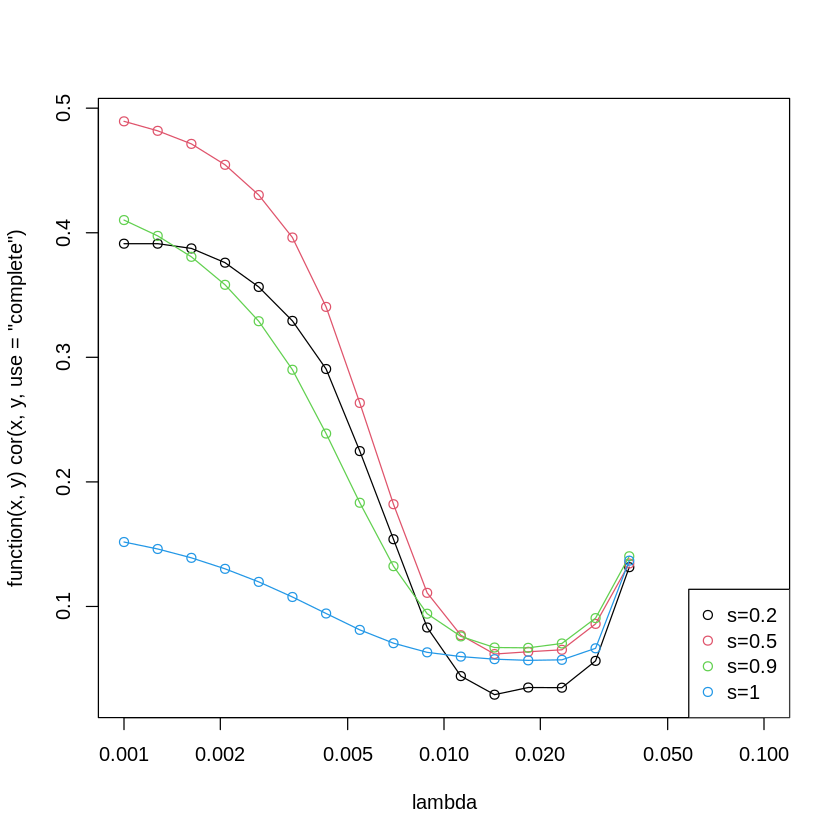

In [5]:
# Run the lassosum pipeline
# The cluster parameter is used for multi-threading
# You can ignore that if you do not wish to perform multi-threaded processing
out <- lassosum.pipeline(
    cor = cor,
    chr = ss$CHR,
    pos = ss$BP,
    A1 = ss$A1,
    A2 = ss$A2,
    ref.bfile = bfile,
    test.bfile = bfile,
    LDblocks = ld.file, 
    cluster=cl
)
# Store the R2 results
target.res <- validate(out, pheno = target.pheno, covar=cov)
# Get the maximum R2
r2 <- max(target.res$validation.table$value)^2